<a href="https://colab.research.google.com/github/galdir/Deep-Learning-1---Introducao-com-Keras/blob/master/Deep_Learning_1_Introducao_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


4423680/4422102 [==============================] - 0s 0us/step


# Exploração dos dados

In [15]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

# Exibição dos dados

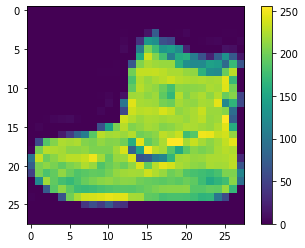

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

# Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

# Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5298 - accuracy: 0.8112 - val_loss: 0.4159 - val_accuracy: 0.8489
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3998 - accuracy: 0.8556 - val_loss: 0.3893 - val_accuracy: 0.8572
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3655 - accuracy: 0.8662 - val_loss: 0.3516 - val_accuracy: 0.8709
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3400 - accuracy: 0.8747 - val_loss: 0.3335 - val_accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3233 - accuracy: 0.8800 - val_loss: 0.3345 - val_accuracy: 0.8781


Visualizando as acurácias de treino e validação por época

In [9]:
historico.history

{'accuracy': [0.8111666440963745,
  0.8556041717529297,
  0.8661875128746033,
  0.8746874928474426,
  0.8799999952316284],
 'loss': [0.5297507047653198,
  0.3998335897922516,
  0.36550578474998474,
  0.34004026651382446,
  0.3233076333999634],
 'val_accuracy': [0.8489166498184204,
  0.8571666479110718,
  0.8709166646003723,
  0.8809166550636292,
  0.878083348274231],
 'val_loss': [0.4158877730369568,
  0.38933297991752625,
  0.351620078086853,
  0.33350056409835815,
  0.3344661593437195]}

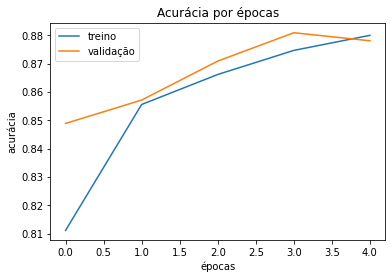

In [11]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

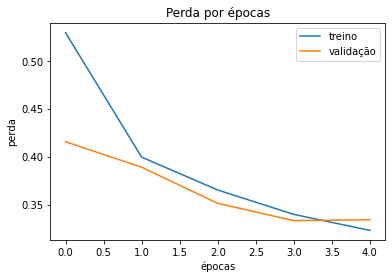

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

# Salvando o modelo treinado

In [ ]:
modelo.save('modelo.h5')

# Carregando o modelo treinado

In [ ]:
modelo_salvo = load_model('modelo.h5')

# Testando o modelo salvo

In [13]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


# Avaliando o modelo

In [14]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 52.3175 - accuracy: 0.8547
Perda do teste: 52.31745910644531
Acurácia do teste: 0.8547000288963318
